In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('gnuplot2', n_colors=14)
import pandas as pd
import numpy as np

In [3]:
d = {'Comedy': 39053, 'Drama': 41928, 'Thriller': 26452, 'Horror': 7291, 'Romance': 18124, 'Crime': 16681, 
     'Action': 30635, 'Adventure': 24161, 'Fantasy': 11834, 'Sci-Fi': 17243, 'Animation': 6988, 'Children': 9208,
     'Mystery': 7674, 'War': 4859}

<AxesSubplot:>

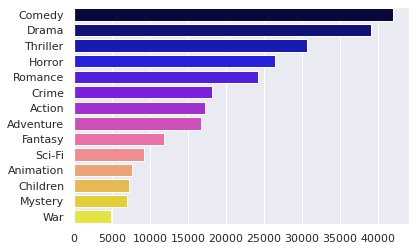

In [17]:
keys = list(d.keys())
# get values in the same order as keys, and parse percentage values
vals = sorted([d[k]for k in keys], reverse=True)
sns.barplot(x=vals, y=keys)

In [19]:
group_d = {'(Comedy)': 7196,
            '(Drama)':6291,
            '(Comedy,Romance)': 3967,
            '(Comedy,Drama,Romance)': 3000,
            '(Comedy,Drama)': 2851,
            '(Drama,Romance)': 2838,
            '(Action,Adventure,Sci-Fi)': 2361,
            '(Crime,Drama)': 2315,
            '(Action,Crime,Thriller)': 1554,
            '(Action,Adventure,Thriller)': 1455,
            '(Action,Adventure,Sci-Fi,Thriller)': 1446,
            '(Drama,Thriller)': 1365
          }


<AxesSubplot:>

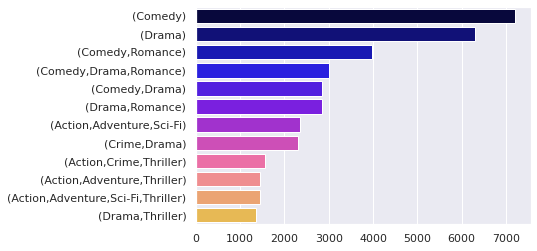

In [21]:
keys = list(group_d.keys())
# get values in the same order as keys, and parse percentage values
vals = sorted([group_d[k]for k in keys], reverse=True)
sns.barplot(x=vals, y=keys)

In [97]:
s = ''' 356	Forrest Gump	329
        318	Shawshank Redemption, The	317
        296	Pulp Fiction	307
        593	Silence of the Lambs, The	279
        2571	Matrix, The	278
        260	Star Wars: Episode IV - A New Hope	251
        480	Jurassic Park	238
        110	Braveheart	237
        589	Terminator 2: Judgment Day	224
        527	Schindler's List	220'''

top_rated = {x.strip().split('\t')[1]:int(x.strip().split('\t')[2]) for x in s.split('\n')}
top_rated


{'Forrest Gump': 329,
 'Shawshank Redemption, The': 317,
 'Pulp Fiction': 307,
 'Silence of the Lambs, The': 279,
 'Matrix, The': 278,
 'Star Wars: Episode IV - A New Hope': 251,
 'Jurassic Park': 238,
 'Braveheart': 237,
 'Terminator 2: Judgment Day': 224,
 "Schindler's List": 220}

In [98]:
t = ''' 318	Shawshank Redemption, The	225
        356	Forrest Gump	210
        296	Pulp Fiction	200
        593	Silence of the Lambs, The	189
        2571	Matrix, The	181
        260	Star Wars: Episode IV - A New Hope	177
        110	Braveheart	145
        1198	Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost	143
        1196	Star Wars: Episode V - The Empire Strikes Back	140
        527	Schindler's List	139'''
most_4s_5s = {x.strip().split('\t')[1]:int(x.strip().split('\t')[2]) for x in t.split('\n')}
most_4s_5s

{'Shawshank Redemption, The': 225,
 'Forrest Gump': 210,
 'Pulp Fiction': 200,
 'Silence of the Lambs, The': 189,
 'Matrix, The': 181,
 'Star Wars: Episode IV - A New Hope': 177,
 'Braveheart': 145,
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost': 143,
 'Star Wars: Episode V - The Empire Strikes Back': 140,
 "Schindler's List": 139}

In [105]:
df1 = pd.DataFrame.from_dict(top_rated, orient='index').T
df2 = pd.DataFrame.from_dict(most_4s_5s, orient='index').T
df = df1.merge(df2, how='outer').T
df.columns = ['top_rated', 'most_4s_5s']
df = df.reset_index()
df.dropna(inplace=True)
df
# df
# jurassic park & terminator 2 in top_rated
# raiders of the lost ark & star wars v in 4s_5s

,index,top_rated,most_4s_5s
0,Forrest Gump,329.0,210.0
1,"Shawshank Redemption, The",317.0,225.0
2,Pulp Fiction,307.0,200.0
3,"Silence of the Lambs, The",279.0,189.0
4,"Matrix, The",278.0,181.0
5,Star Wars: Episode IV - A New Hope,251.0,177.0
7,Braveheart,237.0,145.0
9,Schindler's List,220.0,139.0


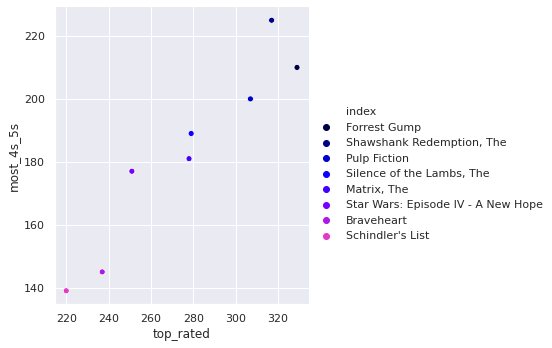

In [106]:
sns.relplot(data=df, x="top_rated", y="most_4s_5s", hue='index')
